# Naive Bayes Spam Email Classifier

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam, test_size = 0.25)

Let's create feature colums from the unique words in our entire df

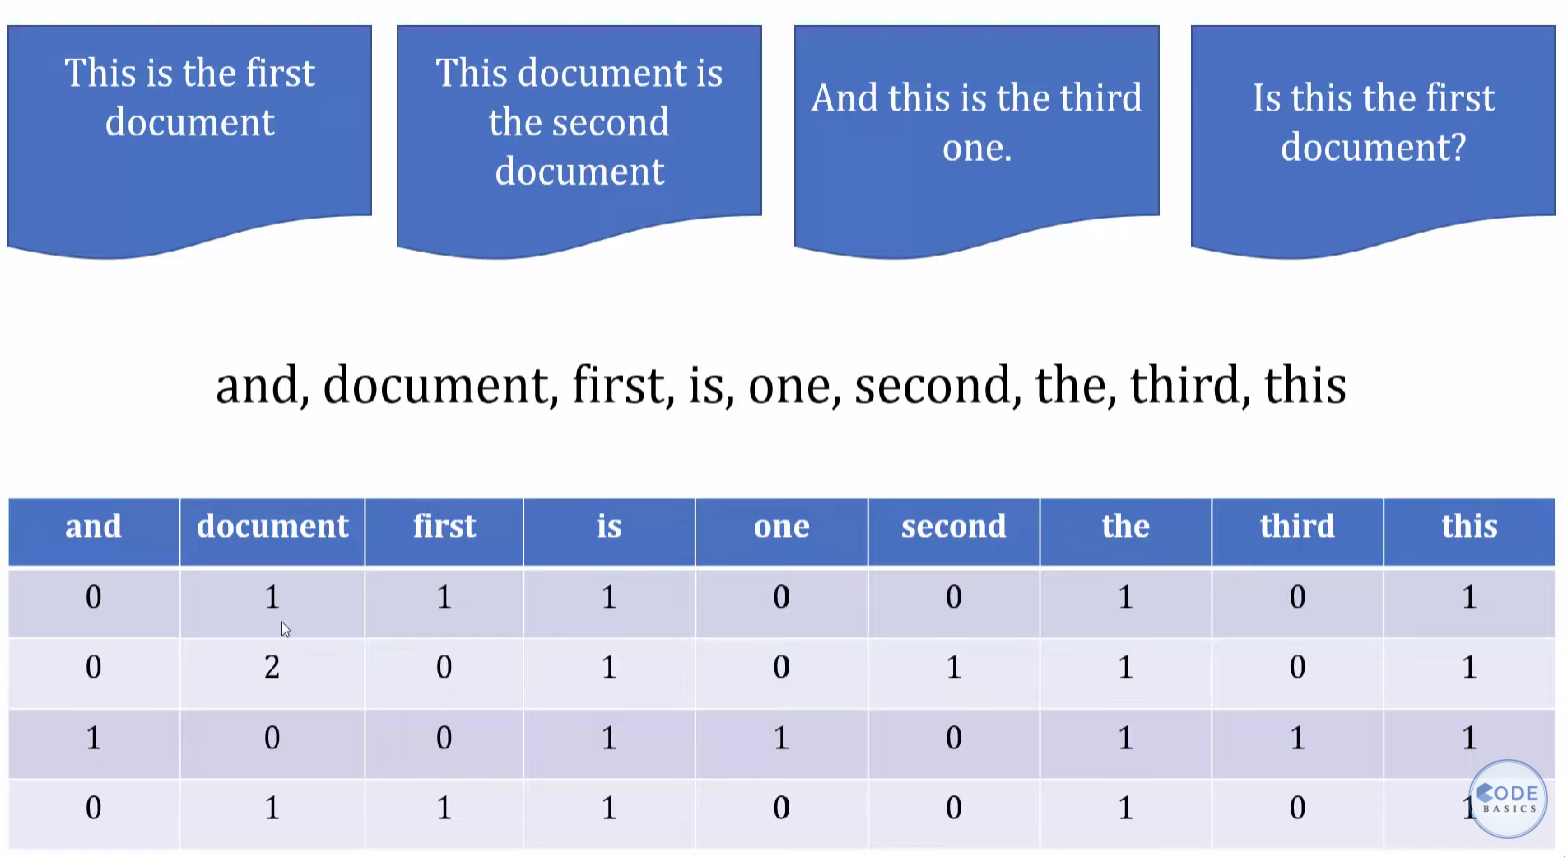

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<br>
<br>
<br>
<br>

**Choosing which Naive Bayes model to use**
<br>
<br>
<br>
<br>
<br>



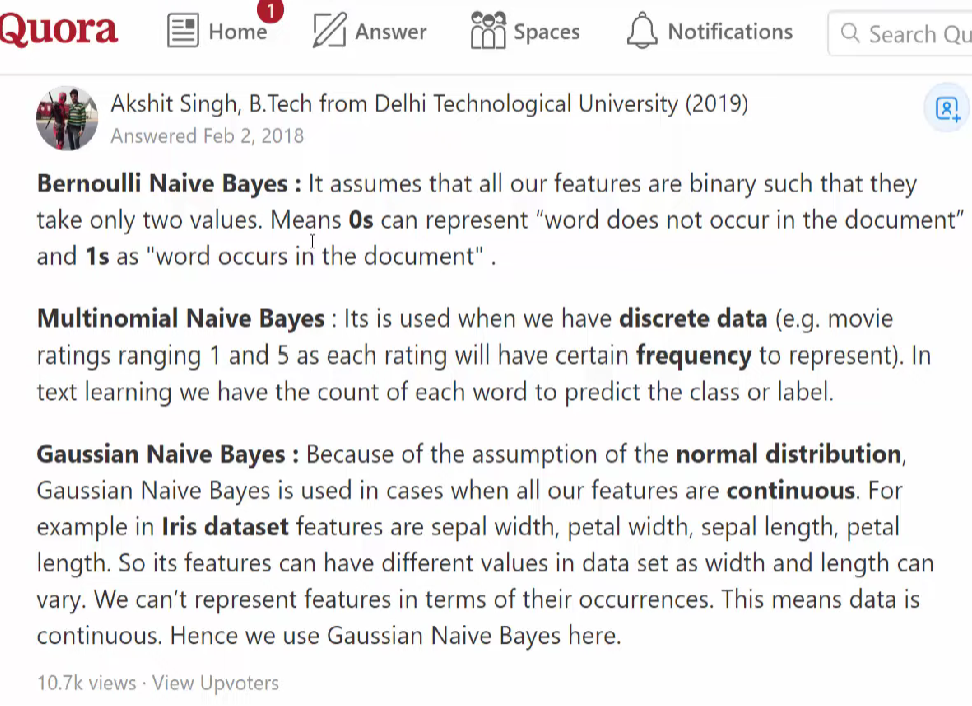

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)
params = model.get_params()
print(params)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}


In [9]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [10]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9870782483847811

**Sklearn Pipeline to shorten our steps**

In [11]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [13]:
clf.fit(X_train, y_train)
parameters = clf.get_params()
print(parameters)

{'memory': None, 'steps': [('vectorizer', CountVectorizer()), ('nb', MultinomialNB())], 'verbose': False, 'vectorizer': CountVectorizer(), 'nb': MultinomialNB(), 'vectorizer__analyzer': 'word', 'vectorizer__binary': False, 'vectorizer__decode_error': 'strict', 'vectorizer__dtype': <class 'numpy.int64'>, 'vectorizer__encoding': 'utf-8', 'vectorizer__input': 'content', 'vectorizer__lowercase': True, 'vectorizer__max_df': 1.0, 'vectorizer__max_features': None, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1), 'vectorizer__preprocessor': None, 'vectorizer__stop_words': None, 'vectorizer__strip_accents': None, 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b', 'vectorizer__tokenizer': None, 'vectorizer__vocabulary': None, 'nb__alpha': 1.0, 'nb__class_prior': None, 'nb__fit_prior': True, 'nb__force_alpha': 'warn'}


In [14]:
clf.score(X_test,y_test)

0.9870782483847811

In [15]:
clf.predict(emails)

array([0, 1], dtype=int64)

In [16]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)